<a href="https://colab.research.google.com/github/jadedveldon/Adventurer_special/blob/master/Breast_Cancer_Detection_Using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection Using Artificial Neural Networks

![image.png](attachment:image.png)

## Importing libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing dataset

In [0]:
dataset=pd.read_csv('data.csv')

FileNotFoundError: ignored

## Printing the dataset

In [0]:
dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

## Encoding the 'diagnosis' column into 0s and 1s

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['diagnosis']=encoder.fit_transform(dataset['diagnosis'])
dataset

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1       17.990         10.38          122.80   
1      842517          1       20.570         17.77          132.90   
2    84300903          1       19.690         21.25          130.00   
3    84348301          1       11.420         20.38           77.58   
4    84358402          1       20.290         14.34          135.10   
5      843786          1       12.450         15.70           82.57   
6      844359          1       18.250         19.98          119.60   
7    84458202          1       13.710         20.83           90.20   
8      844981          1       13.000         21.82           87.50   
9    84501001          1       12.460         24.04           83.97   
10     845636          1       16.020         23.24          102.70   
11   84610002          1       15.780         17.89          103.60   
12     846226          1       19.170         24.80          132.40   
13     846381          1       15.850         23.95          103.70   
14   84667401          1       13.730         22.61           93.60   
15   84799002          1       14.540         27.54           96.73   
16     848406          1       14.680         20.13           94.74   
17   84862001          1       16.130         20.68          108.10   
18     849014          1       19.810         22.15          130.00   
19    8510426          0       13.540         14.36           87.46   
20    8510653          0       13.080         15.71           85.63   
21    8510824          0        9.504         12.44           60.34   
22    8511133          1       15.340         14.26          102.50   
23     851509          1       21.160         23.04          137.20   
24     852552          1       16.650         21.38          110.00   
25     852631          1       17.140         16.40          116.00   
26     852763          1       14.580         21.53           97.41   
27     852781          1       18.610         20.25          122.10   
28     852973          1       15.300         25.27          102.40   
29     853201          1       17.570         15.05          115.00   
..        ...        ...          ...           ...             ...   
539    921362          0        7.691         25.44           48.34   
540    921385          0       11.540         14.44           74.65   
541    921386          0       14.470         24.99           95.81   
542    921644          0       14.740         25.42           94.70   
543    922296          0       13.210         28.06           84.88   
544    922297          0       13.870         20.70           89.77   
545    922576          0       13.620         23.23           87.19   
546    922577          0       10.320         16.35           65.31   
547    922840          0       10.260         16.58           65.85   
548    923169          0        9.683         19.34           61.05   
549    923465          0       10.820         24.21           68.89   
550    923748          0       10.860         21.48           68.51   
551    923780          0       11.130         22.44           71.49   
552    924084          0       12.770         29.43           81.35   
553    924342          0        9.333         21.94           59.01   
554    924632          0       12.880         28.92           82.50   
555    924934          0       10.290         27.61           65.67   
556    924964          0       10.160         19.59           64.73   
557    925236          0        9.423         27.88           59.26   
558    925277          0       14.590         22.68           96.39   
559    925291          0       11.510         23.93           74.52   
560    925292          0       14.050         27.15           91.38   
561    925311          0       11.200         29.37           70.67   
562    925622          1       15.220         30.62          103.40   
563    926125          1       20.9

## Dropping the unnecessary columns

In [0]:
dataset=dataset.drop(['Unnamed: 32','id'],axis=1)


In [0]:
dataset

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1       17.990         10.38          122.80     1001.0   
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
3            1       11.420         20.38           77.58      386.1   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
9            1       12.460         24.04           83.97      475.9   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
12           1       19.170         24.80          132.40     1123.0   
13           1       15.850         23.95          103.70      782.7   
14           1       13.730         22.61           93.60      578.3   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.68          108.10      798.8   
18           1       19.810         22.15          130.00     1260.0   
19           0       13.540         14.36           87.46      566.3   
20           0       13.080         15.71           85.63      520.0   
21           0        9.504         12.44           60.34      273.9   
22           1       15.340         14.26          102.50      704.4   
23           1       21.160         23.04          137.20     1404.0   
24           1       16.650         21.38          110.00      904.6   
25           1       17.140         16.40          116.00      912.7   
26           1       14.580         21.53           97.41      644.8   
27           1       18.610         20.25          122.10     1094.0   
28           1       15.300         25.27          102.40      732.4   
29           1       17.570         15.05          115.00      955.1   
..         ...          ...           ...             ...        ...   
539          0        7.691         25.44           48.34      170.4   
540          0       11.540         14.44           74.65      402.9   
541          0       14.470         24.99           95.81      656.4   
542          0       14.740         25.42           94.70      668.6   
543          0       13.210         28.06           84.88      538.4   
544          0       13.870         20.70           89.77      584.8   
545          0       13.620         23.23           87.19      573.2   
546          0       10.320         16.35           65.31      324.9   
547          0       10.260         16.58           65.85      320.8   
548          0        9.683         19.34           61.05      285.7   
549          0       10.820         24.21           68.89      361.6   
550          0       10.860         21.48           68.51      360.5   
551          0       11.130         22.44           71.49      378.4   
552          0       12.770         29.43           81.35      507.9   
553          0        9.333         21.94           59.01      264.0   
554          0       12.880         28.92           82.50      514.3   
555          0       10.290         27.61           65.67      321.4   
556          0       10.160         19.59           64.73      311.7   
557          0        9.423         27.88           59.26      271.3   
558          0       14.590         22.68           96.39      657.1   
559          0       11.510         23.93           74.52      403.5   
560          0       14.050         27.15           91.38      600.4   
561          0       11.200         29.37           70.67      386.0   
562          1       15.220         30.62    

## Description of dataset

In [0]:
dataset.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Information of dataset

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

## Checking for any null values

In [0]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Heatmap showing the correlation values

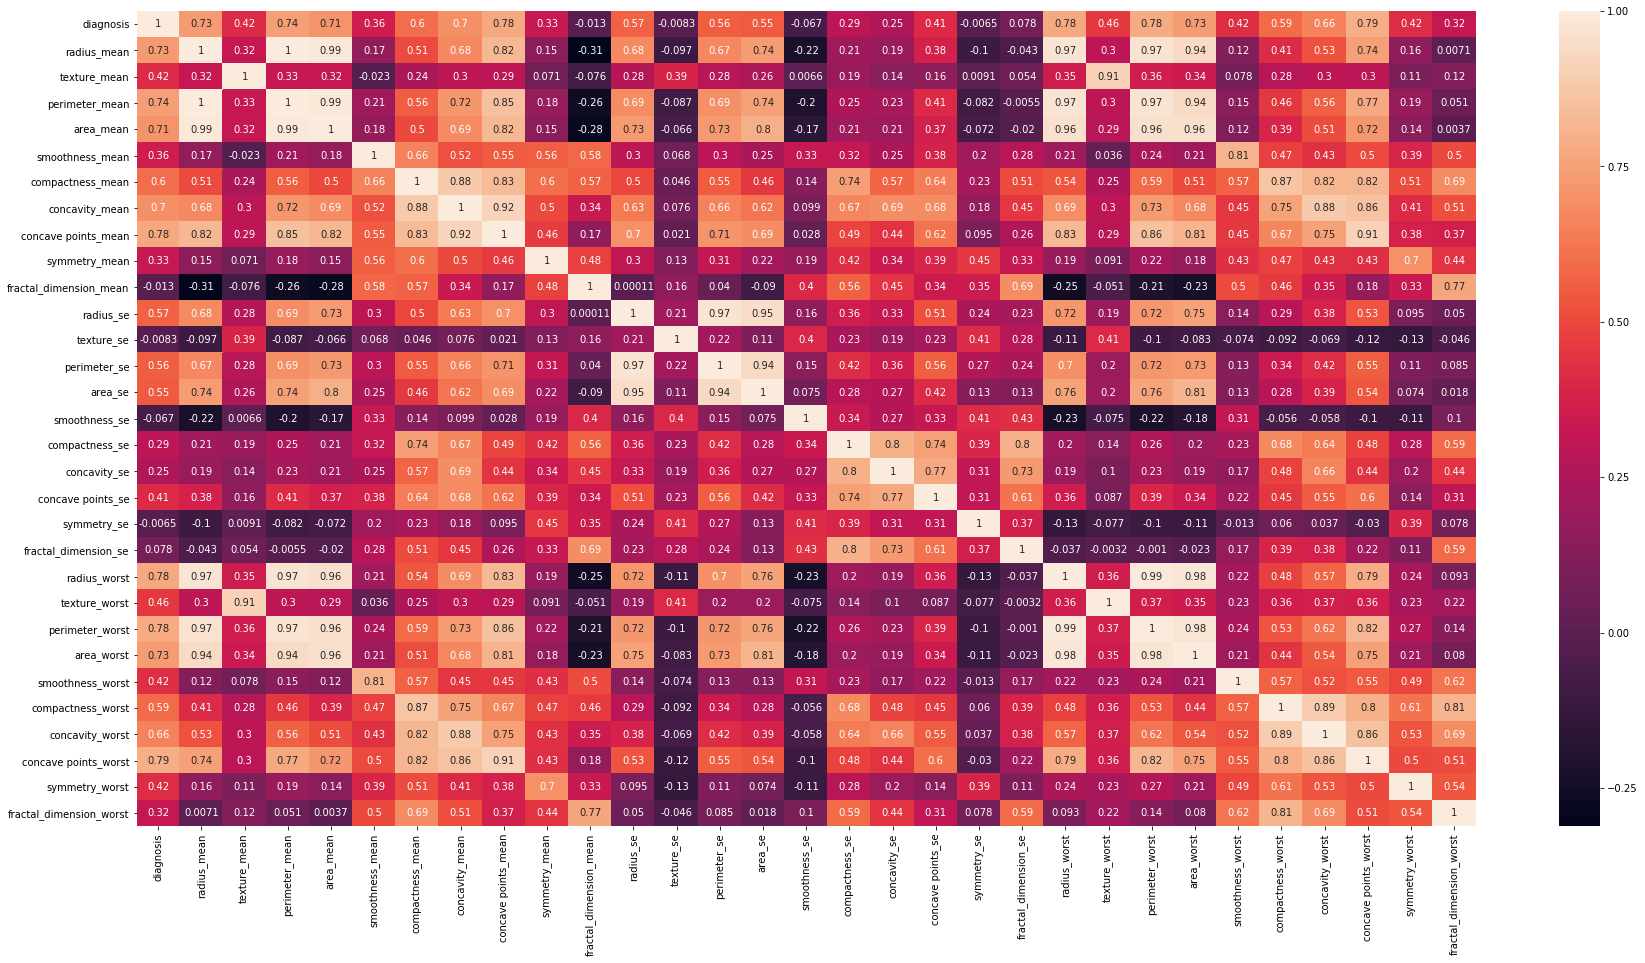

In [0]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)

## Pairplots showing the values of different attributes contributing towards the presence/absence of breast cancer

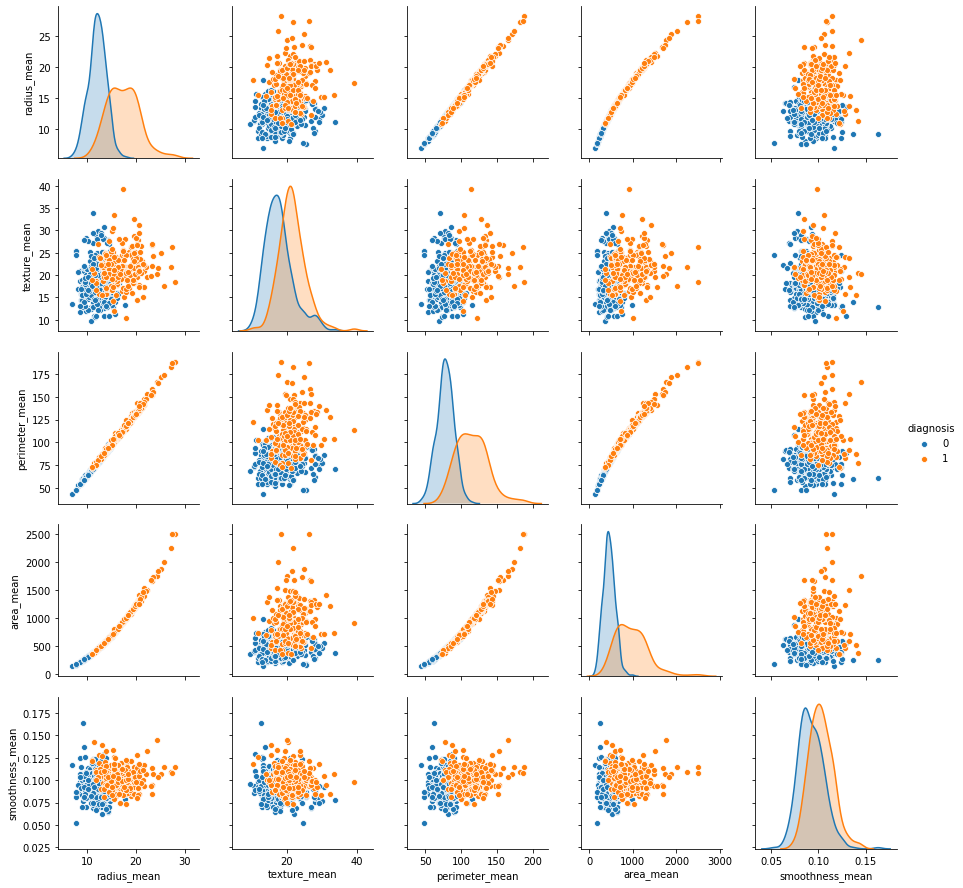

In [0]:
sns.pairplot(dataset,hue='diagnosis',vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'])

## Getting independent and dependent variables from the dataset

In [0]:
X=dataset.iloc[:,1:]
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
..           ...           ...             ...        ...              ...   
539        7.691         25.44           48.34      170.4          0.08668   
540       11.540         14.44           74.65      402.9          0.09984   
541       14.470         24.99           95.81      656.4          0.08837   
542       14.740         25.42           94.70      668.6          0.08275   
543       13.210         28.06           84.88      538.4          0.08671   
544       13.870         20.70           89.77      584.8          0.09578   
545       13.620         23.23           87.19      573.2          0.09246   
546       10.320         16.35           65.31      324.9          0.09434   
547       10.260         16.58           65.85      320.8          0.08877   
548        9.683         19.34           61.05      285.7          0.08491   
549       10.820         24.21           68.89      361.6          0.08192   
550       10.860         21.48           68.51      360.5          0.07431   
551       11.130         22.44           71.49      378.4          0.09566   
552       12.770         29.43           81.35      507.9          0.08276   
553        9.333         21.94           59.01      264.0          0.09240   
554       12.880         28.92           82.50      514.3          0.08123   
555       10.290         27.61           65.67      321.4          0.09030   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22

In [0]:
y=dataset.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [0]:
X=X.values
y=y.values

## Normalization (scaling all the values between 0 and 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

## Splitting into training and test set

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

test_x.shape

(114, 30)

## Applying ANN and finding the best values for the hyperparameters

In [0]:
import keras
from keras.models import Sequential

from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


classifier = KerasClassifier(build_fn = build_classifier)

parameters={'batch_size': [10,20,30], 'epochs' : [100,200,300]}

#now we will implement gridsearch 

grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5,n_jobs=-1)

grid_search=grid_search.fit(train_x,train_y)
best_parameters=grid_search.best_params_

Using TensorFlow backend.
E:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
455/455 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.6549
Epoch 2/100
455/455 [==============================] - 0s 286us/step - loss: 0.6668 - accuracy: 0.9297
Epoch 3/100
455/455 [==============================] - 0s 308us/step - loss: 0.5843 - accuracy: 0.8879
Epoch 4/100
455/455 [==============================] - 0s 356us/step - loss: 0.4644 - accuracy: 0.9187
Epoch 5/100
455/455 [==============================] - 0s 340us/step - loss: 0.3557 - accuracy: 0.9275
Epoch 6/100
455/455 [==============================] - 0s 321us/step - loss: 0.2733 - accuracy: 0.9319
Epoch 7/100
455/455 [==============================] - 0s 180us/step - loss: 0.2203 - accuracy: 0.9451
Epoch 8/100
455/455 [==============================] - 0s 351us/step - loss: 0.1910 - accuracy: 0.9451
Epoch 9/100
455/455 [==============================] - 0s 

In [0]:
best_parameters

{'batch_size': 10, 'epochs': 100}

## Applying ANN with the optimized values of hyperparameters

In [0]:
from keras.models import Sequential
from keras.layers import Dense


In [0]:
classifier=Sequential()

In [0]:

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(train_x,train_y,epochs=100,batch_size=30,validation_data = (test_x,test_y))

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.6198 - val_loss: 0.6915 - val_accuracy: 0.5877
Epoch 2/100
455/455 [==============================] - 0s 152us/step - loss: 0.6892 - accuracy: 0.6374 - val_loss: 0.6891 - val_accuracy: 0.5877
Epoch 3/100
455/455 [==============================] - 0s 123us/step - loss: 0.6855 - accuracy: 0.6374 - val_loss: 0.6850 - val_accuracy: 0.5877
Epoch 4/100
455/455 [==============================] - 0s 119us/step - loss: 0.6789 - accuracy: 0.6374 - val_loss: 0.6774 - val_accuracy: 0.5877
Epoch 5/100
455/455 [==============================] - 0s 88us/step - loss: 0.6670 - accuracy: 0.6505 - val_loss: 0.6632 - val_accuracy: 0.6228
Epoch 6/100
455/455 [==============================] - 0s 99us/step - loss: 0.6476 - accuracy: 0.7297 - val_loss: 0.6400 - val_accuracy: 0.6842
Epoch 7/100
455/455 [==============================] - 0s 125us/step - loss: 0.6184 - ac

455/455 [==============================] - 0s 59us/step - loss: 0.0781 - accuracy: 0.9802 - val_loss: 0.1241 - val_accuracy: 0.9649
Epoch 58/100
455/455 [==============================] - 0s 59us/step - loss: 0.0781 - accuracy: 0.9802 - val_loss: 0.1219 - val_accuracy: 0.9649
Epoch 59/100
455/455 [==============================] - 0s 57us/step - loss: 0.0769 - accuracy: 0.9846 - val_loss: 0.1221 - val_accuracy: 0.9649
Epoch 60/100
455/455 [==============================] - 0s 64us/step - loss: 0.0759 - accuracy: 0.9780 - val_loss: 0.1226 - val_accuracy: 0.9649
Epoch 61/100
455/455 [==============================] - 0s 81us/step - loss: 0.0760 - accuracy: 0.9780 - val_loss: 0.1210 - val_accuracy: 0.9649
Epoch 62/100
455/455 [==============================] - 0s 66us/step - loss: 0.0735 - accuracy: 0.9846 - val_loss: 0.1219 - val_accuracy: 0.9649
Epoch 63/100
455/455 [==============================] - 0s 97us/step - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.1216 - val_accuracy: 0.964

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

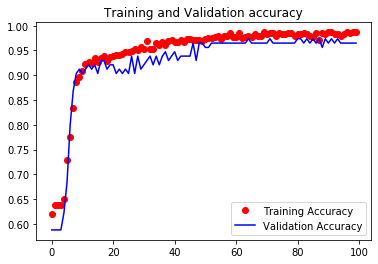

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


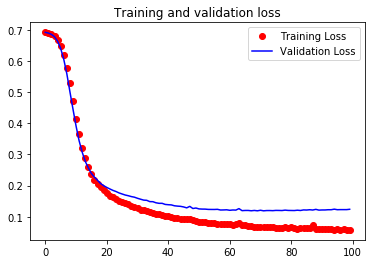

In [0]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predictions on test data

In [0]:
y_pred = classifier.predict(test_x)
#probability showing the individual having breast cancer (Malignant)
#probability over 50% would indicate the presence of breast cancer

y_pred = (y_pred > 0.5)   #Converting the probabilities into 'true' and 'false'

## Confusion matrix and heatmap for visualizing the accuracy of ANN on test data

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
cm

array([[65,  2],
       [ 2, 45]], dtype=int64)

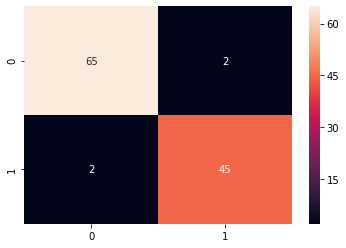

In [0]:
sns.heatmap(cm,annot=True)

## Accuracy on test data

In [0]:
print("Accuracy Score:",round((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100,2))

Accuracy Score: 96.49


# End of Project.